Não existem IDs em comum entre test.csv e train.csv.
Os arquivos CSV são diferentes após ordenação por 'id'.
Arquivos CSV mesclados com sucesso em fly_satisfaction.csv.
<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate 

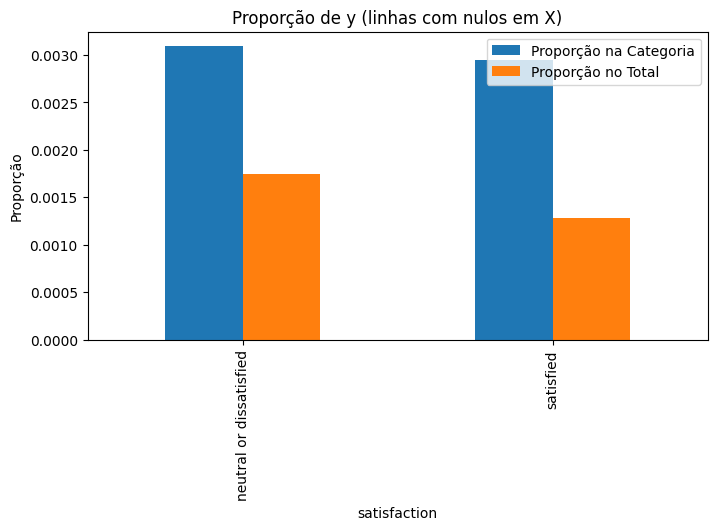


Verificando se ainda há valores nulos em X:
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

def remove_ids(list_names):
    return [_remove_id(name) for name in list_names]

def _remove_id(filename):
    df = pd.read_csv(filename)
    if 'Unnamed: 0' in df.columns:
        print(f"Removing 'Unnamed: 0' from {filename}")
        df = df.drop(columns=['Unnamed: 0'])
    return df

def merge_csvs(df_test, df_train, name):
    merged_df = pd.concat([df_test, df_train], ignore_index=True)
    merged_df.sort_values(by='id', ascending=True, inplace=True)
    merged_df.drop('id', axis=1, inplace=True)
    merged_df.to_csv(f'{name}.csv', index=False)
    print(f"Arquivos CSV mesclados com sucesso em {name}.csv.")
    return merged_df

def check_commons_ids(df_test, df_train):
    if 'id' in df_test.columns and 'id' in df_train.columns:
        common_ids = df_test['id'].isin(df_train['id'])
        if common_ids.any():
            print("Existem IDs em comum entre test.csv e train.csv.")
            print("Exemplo de IDs em comum:", df_test.loc[common_ids, 'id'].unique()[:10])
            return True
        else:
            print("Não existem IDs em comum entre test.csv e train.csv.")
            return False
    else:
        print("A coluna 'id' não existe em um dos arquivos.")
        return False

def order_by_id_and_compare_csvs_by_id(df_test, df_train):
    df_test = df_test.sort_values(by='id', ascending=True).reset_index(drop=True)
    df_train = df_train.sort_values(by='id', ascending=True).reset_index(drop=True)
    if check_commons_ids(df_test, df_train):
        print("Os arquivos CSV são iguais após ordenação por 'id'.")
    else:
        print("Os arquivos CSV são diferentes após ordenação por 'id'.")
    merged_df = merge_csvs(df_test, df_train, 'fly_satisfaction')
    return df_test, df_train, merged_df

def main():
    dfs = remove_ids(['train.csv', 'test.csv'])
    df_train, df_test, fly_satisfaction_df = order_by_id_and_compare_csvs_by_id(dfs[0], dfs[1])

main()